## Imports

In [1]:
from ipynb.fs.full.Jacobian import *
from ipynb.fs.full.SubFunctions import *
from ipynb.fs.full.GlobalVars import *

## Solver for one differencial equation

In [2]:
def Solver_one_equation(expr, u0, use_trapezoidal, symbol):
    t0 = 0
    f_uk = 1
    uk_1 = u0
    uk_global = u0
    nb = 0
    
    #Each list is an axis.
    #Time = [t0, t1, t2, ...., tn]
    #Function = [u0, u1, u2, ...., un]
    function = [u0]
    time = [t0]

    #Loop for the time
    while(t0 < interval):
        t0 += delta
        nb = 0
        #Newton's method
        while(nb < Nnewton):
            
            # First step, we change our equation to f(x) = 0
            f = create_f(symbol, uk_global, expr, use_trapezoidal)
            # We recup the term f(uk-1)
            f_uk_1 = float(f.subs(symbol, uk_1))
    
            
            #We recup the term f'(uk_1)
            f_uk_1_prime = Jacobian_one(f).subs(symbol, uk_1)

            #Formula : uk = uk_1 - (f(uk_1) / f'(uk_1))
            uk = float(uk_1 - (f_uk_1 / f_uk_1_prime))            
            
            #Check the approximation. If f_uk < Epsilon = good approximation
            f_uk = float(f.subs(symbol, uk))
            uk_1 = uk
            if(f_uk < Epsilon):
                break
        
        
        #Update our 2 lists and indexes.
        time.append(t0)
        function.append(uk)

        uk_global = uk
        f_uk = 1
        print("--------")
        nb += 1

    return result_solver(time, function)

In [3]:
def Solver_one_equation_trigo(expr, u0, use_trapezoidal, symbol):
    t0 = 0
    un_1 = u0
    un = u0

    function = [u0]
    time = [t0]

    #Loop for the time
    while(t0 < interval):
        t0 += delta
        nb = 0
        f_un_plus1 = 1
        
        #Newton's method
        while(nb < Nnewton):
            
            f = create_f(symbol, un_1, expr, use_trapezoidal)
            f_un = f.subs(symbol, un)
            f_un_prime = Jacobian_one(f).subs(symbol, un)
            
            un_plus1 = float(un - (f_un / f_un_prime))
            f_un_plus1 = float(f.subs(symbol, un_plus1))
            
            un = un_plus1
            nb += 1
            
            if(f_un_plus1 < Epsilon):
                break
            
            print("t0 = ", end='')
            print(t0)
            print("un = ", end='')
            print(un)
            print("f = ", end='')
            print(f)
            print("fun = ", end='')
            print(f_un)
            print("f un prime = ", end='')
            print(f_un_prime)
            print("un+1 = ", end='')
            print(un_plus1)
            print("fun+1 = ", end='')
            print(f_un_plus1)
        
        un_1 = un
        print("------")
        time.append(t0)
        function.append(un_plus1)
        
    return result_solver(time, function)

In [4]:
f = 101*u -100
un = 0.99
f_un = f.subs(u, un)
print(f_un)

-0.0100000000000051


## Solver for 2 differentials equations

In [5]:
def Solver_two_equations(u0, v0, f1, f2, use_trapezoidal):
    t0 = 0
    f_xk = 1
    xk_1 = np.array([u0, v0])
    xn_1_global = np.array([u0, v0])
    
    #Each list is an axis.
    #Time = [t0, t1, t2, ...., tn]
    #Functions = [u0, u1, u2, ...., un]
    fu = [u0]
    fv = [v0]
    time = [t0]
    
    #Loop for the time
    while(t0 < interval):
        t0 += delta
        nb = 0
        
        #Newton's method
        while(nb < Nnewton):
            nb+=1
            
            vec_f = create_2_f(xn_1_global, f1, f2, use_trapezoidal)
            F_xk_1 = create_fxk_1(xk_1, vec_f)
            F_xk_1_prime = f_prime_2_eqs(xk_1, vec_f[0], vec_f[1])
            xk = xk_1 - np.dot(LA.inv(F_xk_1_prime), F_xk_1)
          
            #2 types of check the approximation.
            f_xk =[0, 0]
            f_xk[0] = float(vec_f[0].evalf(subs={u: xk[0], v: xk[1]}))
            f_xk[1] = float(vec_f[1].evalf(subs={u: xk[0], v: xk[1]})) 
            
            norm_f_xk = LA.norm(f_xk)
            norm_xk = LA.norm(xk - xn_1_global)
            
            print("t0 = ", end='')
            print(t0)
            print("xk_1 = ", end='')
            print(xk_1)
            print("vecf = ", end='')
            print(vec_f)
            print("fxk_1 = ", end='')
            print(F_xk_1)
            print("fxk_1_prime = ", end='')
            print(F_xk_1_prime)
            print("xk = ", end='')
            print(xk)
            xk_1 = xk

            if(norm_xk < Epsilon or norm_f_xk < Epsilon):
                break
            
        
        #Update our 3 lists and indexes.
        print("------------------------")
        time.append(t0)
        fu.append(xk[0])
        fv.append(xk[1])
        
        xn_1_global = np.array([xk[0],xk[1]])
        f_xk = 1        
      
    return result_solver(time, fu, fv)

## Solver for 4 differentials equations

In [6]:
def Solver_4_equations(u0, v0, f1, f2, use_trapezoidal):
    t0 = 0
    f_xk = 1
    uk_1 = u0
    vk_1 = v0
    xk_1 = np.array([u0, v0])
    xn_1_global = np.array([u0, v0])
    
    #Each list is an axis.
    #Time = [t0, t1, t2, ...., tn]
    #Functions = [u0, u1, u2, ...., un]
    fu = [u0]
    fv = [v0]
    time = [t0]
    
    #Suit of x and y variables
    y0 = u0*v0
    x0 = u0 + v0 - y0
    x = [x0]
    y = [y0]
    
    #Loop for the time
    while(t0 < interval):
        t0 += delta
        nb = 0
        
        #Newton's method
        while(nb < Nnewton):
            nb+=1
            
            # First step, we change our equation to F(x) = 0
            vec_f = create_2_f(xn_1_global, f1, f2, use_trapezoidal)
            
            #Creating F(xk-1)
            F_xk_1 = create_fxk_1(xk_1, vec_f)
            
            #Creating F'(xk-1)
            F_xk_1_prime = f_prime_2_eqs(xk_1, vec_f[0], vec_f[1])
        
            #Formula : xk = xk_1 - tr(F'(xk_1)) * F(xk_1)
            xk = xk_1 - np.dot(LA.inv(F_xk_1_prime), F_xk_1)
            
            #With the uk+1 and vk+1 calculated, we can calcul the x and y value.
            next_y = xk[0]*xk[1]
            next_x = xk[0] + xk[1] - next_y
            
            #Calcul of f(uk, vk, xk, yk) for the approximation
            f_xk = [0, 0, 0, 0]
            f_xk[0] = float(vec_f[0].evalf(subs={u: xk[0], v: xk[1]}))
            f_xk[1] = float(vec_f[1].evalf(subs={u: xk[0], v: xk[1]}))
            f_xk[2] = float(next_x)
            f_xk[3] = float(next_y)
            
            #2 types of check the approximation.
            norm_f_xk = LA.norm(f_xk)
            norm_xk = LA.norm(xk - xn_1_global)
            
            if(norm_xk < Epsilon or norm_f_xk < Epsilon):
                break
            
            xk_1 = xk
        
        #Update our 2 functions + time
        time.append(t0)
        fu.append(xk[0])
        fv.append(xk[1])
        
        #Update x and y variables
        x.append(next_x)
        y.append(next_y)
            
        #Update indexes
        xn_1_global = np.array([xk[0],xk[1]])
        f_xk = 1        
      
    return result_solver(time, fu, fv, x, y)

In [14]:
def solver_octave(u0, v0, f1, f2, use_trapezoidal):
    t0 = 0
    residu_tolerance = 1e-6
    residu_relative_tolerance = 1e-8
    
    exact_newton = True
    
    xn = [u0, v0]
    velocity_n = [-v0 , u0]
    xk = xn
    
    fu = [u0]
    fv = [v0]
    time = [t0]
    
    
    while (t0 < interval):
        t0+= 0.1
        print("t0 = ", end='')
        print(t0)
        
        nb = 0
        has_newton_converged = False

        norm_residu_0 = 0
        norm_residu = 0
        relative_error = 0

        while (not(has_newton_converged) and nb < Nnewton):
            nb += 1
            
            vec_f = create_2_f(xn, f1, f2, use_trapezoidal, velocity_n)
            F_xk_1 = create_fxk_1(xk, vec_f)
            norm_residu = LA.norm(F_xk_1)
            
            
            print("vecf = ", end='')
            print(vec_f)
            print("fxk_1 = ", end='')
            print(F_xk_1)
            print("norme residu = ", end='')
            print(norm_residu)

            if(nb == 1):
                norm_residu_0 = norm_residu
            
            if(norm_residu_0 == 0):
                relative_error = 0
                
            else:
                relative_error = norm_residu / norm_residu_0
            
            if(relative_error < residu_relative_tolerance or norm_residu < residu_tolerance):
                has_newton_converged = True
                
            else:
                has_newton_converged = False
            
            if(not(has_newton_converged)):
                
                F_xk_1_prime = f_prime_2_eqs(xk, vec_f[0], vec_f[1])
                
                if (nb == 1 and not(exact_newton)):
                    update_jacobian = False
                
                
                xk += np.dot(LA.inv(F_xk_1_prime), F_xk_1)
                
                print("fxk_1_prime = ", end='')
                print(F_xk_1_prime)
                print("xk = ", end='')
                print(xk) 
            
            print("-----------------------")

        if(not(has_newton_converged) and nb == Nnewton):
            update_jacobian = True
            #t0 -= delta
            xk = xn
       
            
        #Update our 2 functions + time
        time.append(t0)
        fu.append(xk[0])
        fv.append(xk[1])
        
        #Update indexes
        velocity_n = [2*(xk[0] - xn[0]) / delta - velocity_n[0], 2*(xk[1] - xn[1]) / delta - velocity_n[1]]
        print("velocity_n = ")
        print(velocity_n)
        xn = xk
        print("________________________")
        
        
    return result_solver(time, fu, fv)

t0 = 0.1
0
-v
1
u
vecf = [20.0*u + v - 20.0 -u + 20.0*v - 1]
fxk_1 = [-3.78182804e-124  2.00000000e+000]
norme residu = 2.0
fxk_1_prime = [[20. -1.]
 [ 1. 20.]]
xk = [1.00498753 0.09975062]
-----------------------
0
-v
1
u
vecf = [20.0*u + v - 20.0 -u + 20.0*v - 1]
fxk_1 = [-0.19950125  0.00997506]
norme residu = 0.19975046777556718
fxk_1_prime = [[20. -1.]
 [ 1. 20.]]
xk = [0.99506222 0.10074564]
-----------------------
0
-v
1
u
vecf = [20.0*u + v - 20.0 -u + 20.0*v - 1]
fxk_1 = [-0.00199004 -0.01985062]
norme residu = 0.019950124688279235
fxk_1_prime = [[20. -1.]
 [ 1. 20.]]
xk = [0.99491346 0.09976055]
-----------------------
0
-v
1
u
vecf = [20.0*u + v - 20.0 -u + 20.0*v - 1]
fxk_1 = [ 0.00197019 -0.00029751]
norme residu = 0.001992523369331404
fxk_1_prime = [[20. -1.]
 [ 1. 20.]]
xk = [0.99501098 0.0997408 ]
-----------------------
0
-v
1
u
vecf = [20.0*u + v - 20.0 -u + 20.0*v - 1]
fxk_1 = [3.95034813e-05 1.95043489e-04]
norme residu = 0.00019900373753878816
fxk_1_prime = [[20. -

fxk_1_prime = [[20. -1.]
 [ 1. 20.]]
xk = [-0.10889168  1.2556889 ]
-----------------------
-0.09975081262450392
-v
0.9950125272973835
u
vecf = [20.0*u + v + 2.27758436164407 -u + 20.0*v - 26.1087905127459]
fxk_1 = [-1.35543971  0.88612085]
norme residu = 1.619390926589299
fxk_1_prime = [[20. -1.]
 [ 1. 20.]]
xk = [-0.17428488  1.3032646 ]
-----------------------
-0.09975081262450392
-v
0.9950125272973835
u
vecf = [20.0*u + v + 3.58544837102523 -u + 20.0*v - 27.0603045630614]
fxk_1 = [-1.40301541  0.82072765]
norme residu = 1.6254372111933817
fxk_1_prime = [[20. -1.]
 [ 1. 20.]]
xk = [-0.24221401  1.34769744]
-----------------------
-0.09975081262450392
-v
0.9950125272973835
u
vecf = [20.0*u + v + 4.9440309465303 -u + 20.0*v - 27.948961341214]
fxk_1 = [-1.44744825  0.75279852]
norme residu = 1.6315060706784967
fxk_1_prime = [[20. -1.]
 [ 1. 20.]]
xk = [-0.31252864  1.3888531 ]
-----------------------
velocity_n = 
[0.09975081262450392, -0.9950125272973835]
________________________
t0 =

0.9950125272973835
u
vecf = [20.0*u + v + 2.21539258454111 -u + 20.0*v + 26.8426665451699]
fxk_1 = [1.29213314 0.88923044]
norme residu = 1.5685467245769047
fxk_1_prime = [[20. -1.]
 [ 1. 20.]]
xk = [-0.03911901 -1.35075559]
-----------------------
-0.09975081262450392
-v
0.9950125272973835
u
vecf = [20.0*u + v + 0.882131075380072 -u + 20.0*v + 26.0200991819264]
fxk_1 = [1.25100477 0.95589351]
norme residu = 1.5744031732922048
fxk_1_prime = [[20. -1.]
 [ 1. 20.]]
xk = [ 0.02565901 -1.30619981]
-----------------------
-0.09975081262450392
-v
0.9950125272973835
u
vecf = [20.0*u + v - 0.413429471796652 -u + 20.0*v + 25.1289836951256]
fxk_1 = [1.206449   1.02067154]
norme residu = 1.5802814881024192
fxk_1_prime = [[20. -1.]
 [ 1. 20.]]
xk = [ 0.08837635 -1.2583021 ]
-----------------------
-0.09975081262450392
-v
0.9950125272973835
u
vecf = [20.0*u + v - 1.66777618059722 -u + 20.0*v + 24.1710294890472]
fxk_1 = [1.15855129 1.08338888]
norme residu = 1.5861817506485065
fxk_1_prime = [[20. -1

vecf = [20.0*u + v - 31.4109069114536 -u + 20.0*v + 7.56644461512395]
fxk_1 = [0.42832242 0.57054528]
norme residu = 0.7134297490014236
fxk_1_prime = [[20. -1.]
 [ 1. 20.]]
xk = [ 1.58834333 -0.30118362]
-----------------------
0.09975081262450392
-v
-0.9950125272973835
u
vecf = [20.0*u + v - 31.8666173163394 -u + 20.0*v + 7.01868485772417]
fxk_1 = [0.40093443 0.5933308 ]
norme residu = 0.7160934661043509
fxk_1_prime = [[20. -1.]
 [ 1. 20.]]
xk = [ 1.60981968 -0.27259089]
-----------------------
0.09975081262450392
-v
-0.9950125272973835
u
vecf = [20.0*u + v - 32.2961444675018 -u + 20.0*v + 6.44683041739393]
fxk_1 = [0.37234171 0.61480716]
norme residu = 0.7187671286697654
fxk_1_prime = [[20. -1.]
 [ 1. 20.]]
xk = [ 1.62992353 -0.24285573]
-----------------------
0.09975081262450392
-v
-0.9950125272973835
u
vecf = [20.0*u + v - 32.6982213402216 -u + 20.0*v + 5.85212710558344]
fxk_1 = [0.34260654 0.634911  ]
norme residu = 0.7214507738308188
fxk_1_prime = [[20. -1.]
 [ 1. 20.]]
xk = [ 1

0.9950125272973835
u
vecf = [20.0*u + v - 7.7150558113381 -u + 20.0*v - 38.6251803980805]
fxk_1 = [-1.98125921  1.38575286]
norme residu = 2.4177880442331467
fxk_1_prime = [[20. -1.]
 [ 1. 20.]]
xk = [0.29538015 1.95556405]
-----------------------
-0.09975081262450392
-v
0.9950125272973835
u
vecf = [20.0*u + v - 5.8078522569851 -u + 20.0*v - 40.1062934342936]
fxk_1 = [-2.05531486  1.29039268]
norme residu = 2.426815286752387
fxk_1_prime = [[20. -1.]
 [ 1. 20.]]
xk = [0.19608862 2.02504826]
-----------------------
-0.09975081262450392
-v
0.9950125272973835
u
vecf = [20.0*u + v - 3.82202160966796 -u + 20.0*v - 41.4959776474374]
fxk_1 = [-2.12479907  1.19110115]
norme residu = 2.4358762340902502
fxk_1_prime = [[20. -1.]
 [ 1. 20.]]
xk = [0.09308393 2.08975355]
-----------------------
velocity_n = 
[0.09975081262450392, -0.9950125272973835]
________________________
t0 = 1.7000000000000004
0.09975081262450392
-v
-0.9950125272973835
u
vecf = [20.0*u + v - 1.96142945814799 -u + 20.0*v - 40.80

fxk_1_prime = [[20. -1.]
 [ 1. 20.]]
xk = [-1.25519381 -1.98293628]
-----------------------
-0.09975081262450392
-v
0.9950125272973835
u
vecf = [20.0*u + v + 25.2036270108286 -u + 20.0*v + 38.6637130407811]
fxk_1 = [ 1.88318547 -0.26018128]
norme residu = 1.9010738539953949
fxk_1_prime = [[20. -1.]
 [ 1. 20.]]
xk = [-1.16191818 -2.00060912]
-----------------------
-0.09975081262450392
-v
0.9950125272973835
u
vecf = [20.0*u + v + 23.3381143907301 -u + 20.0*v + 39.0171699543988]
fxk_1 = [ 1.90085831 -0.16690565]
norme residu = 1.9081718520055755
fxk_1_prime = [[20. -1.]
 [ 1. 20.]]
xk = [-1.0675285  -2.01367389]
-----------------------
-0.09975081262450392
-v
0.9950125272973835
u
vecf = [20.0*u + v + 21.4503208457127 -u + 20.0*v + 39.2784652832576]
fxk_1 = [ 1.91392308 -0.07251597]
norme residu = 1.9152963516562074
fxk_1_prime = [[20. -1.]
 [ 1. 20.]]
xk = [-0.97225183 -2.02206352]
-----------------------
-0.09975081262450392
-v
0.9950125272973835
u
vecf = [20.0*u + v + 19.5447874001412 

-v
-0.9950125272973835
u
vecf = [20.0*u + v - 43.8093263303447 -u + 20.0*v - 28.4280618423366]
fxk_1 = [-1.37140291  1.19046625]
norme residu = 1.8160274830580672
fxk_1_prime = [[20. -1.]
 [ 1. 20.]]
xk = [2.12004837 1.53394855]
-----------------------
velocity_n = 
[-0.09975081262450392, 0.9950125272973835]
________________________
t0 = 2.800000000000001
-0.09975081262450392
-v
0.9950125272973835
u
vecf = [20.0*u + v - 42.3012166318511 -u + 20.0*v - 31.6739835491822]
fxk_1 = [-1.63369936  3.1150609 ]
norme residu = 3.5174675575960372
fxk_1_prime = [[20. -1.]
 [ 1. 20.]]
xk = [2.04633534 1.69338725]
-----------------------
-0.09975081262450392
-v
0.9950125272973835
u
vecf = [20.0*u + v - 40.8269559647761 -u + 20.0*v - 34.8627574820571]
fxk_1 = [-1.79313806  3.04134787]
norme residu = 3.530600649544159
fxk_1_prime = [[20. -1.]
 [ 1. 20.]]
xk = [1.96448643 1.84954709]
-----------------------
-0.09975081262450392
-v
0.9950125272973835
u
vecf = [20.0*u + v - 39.1899777432757 -u + 20.0*v - 

vecf = [20.0*u + v + 36.1285384918297 -u + 20.0*v - 54.4120256068866]
fxk_1 = [-2.67060109 -2.80642699]
norme residu = 3.874034417512537
fxk_1_prime = [[20. -1.]
 [ 1. 20.]]
xk = [-1.9516101   2.63704034]
-----------------------
0.09975081262450392
-v
-0.9950125272973835
u
vecf = [20.0*u + v + 38.9324511538852 -u + 20.0*v - 51.7457942474693]
fxk_1 = [-2.53728953 -2.94662263]
norme residu = 3.888498815373299
fxk_1_prime = [[20. -1.]
 [ 1. 20.]]
xk = [-2.08550639  2.49640402]
-----------------------
0.09975081262450392
-v
-0.9950125272973835
u
vecf = [20.0*u + v + 41.6103769966732 -u + 20.0*v - 48.9330679139859]
fxk_1 = [-2.39665321 -3.08051892]
norme residu = 3.9030172186410637
fxk_1_prime = [[20. -1.]
 [ 1. 20.]]
xk = [-2.21272231  2.34873887]
-----------------------
0.09975081262450392
-v
-0.9950125272973835
u
vecf = [20.0*u + v + 44.1546953561024 -u + 20.0*v - 45.9797649141951]
fxk_1 = [-2.24898806 -3.20773484]
norme residu = 3.917589828954648
fxk_1_prime = [[20. -1.]
 [ 1. 20.]]
xk 

-----------------------
-0.09975081262450392
-v
0.9950125272973835
u
vecf = [20.0*u + v + 55.4984053312893 -u + 20.0*v + 43.9130105492994]
fxk_1 = [ 2.14565034 -1.7749202 ]
norme residu = 2.7846287182028595
fxk_1_prime = [[20. -1.]
 [ 1. 20.]]
xk = [-2.66734398 -2.3392766 ]
-----------------------
-0.09975081262450392
-v
0.9950125272973835
u
vecf = [20.0*u + v + 53.4466304372509 -u + 20.0*v + 45.7905194926371]
fxk_1 = [ 2.23952579 -1.67233145]
norme residu = 2.7950256257503256
fxk_1_prime = [[20. -1.]
 [ 1. 20.]]
xk = [-2.55981734 -2.42826951]
-----------------------
-0.09975081262450392
-v
0.9950125272973835
u
vecf = [20.0*u + v + 51.296097553784 -u + 20.0*v + 47.5703775907444]
fxk_1 = [ 2.32851869 -1.56480481]
norme residu = 2.8054613520048757
fxk_1_prime = [[20. -1.]
 [ 1. 20.]]
xk = [-2.447584   -2.51212141]
-----------------------
-0.09975081262450392
-v
0.9950125272973835
u
vecf = [20.0*u + v + 49.051430767959 -u + 20.0*v + 49.2474157397962]
fxk_1 = [ 2.4123706  -1.45257147]
norm

-0.9950125272973835
u
vecf = [20.0*u + v - 47.8219065271332 -u + 20.0*v + 61.9289450598142]
fxk_1 = [3.14644744 1.39109526]
norme residu = 3.440243814904124
fxk_1_prime = [[20. -1.]
 [ 1. 20.]]
xk = [ 2.5465069  -2.98516182]
-----------------------
0.09975081262450392
-v
-0.9950125272973835
u
vecf = [20.0*u + v - 51.0298887736885 -u + 20.0*v + 60.6982489137139]
fxk_1 = [3.08491263 1.55149437]
norme residu = 3.453088578247434
fxk_1_prime = [[20. -1.]
 [ 1. 20.]]
xk = [ 2.70423694 -2.9154736 ]
-----------------------
0.09975081262450392
-v
-0.9950125272973835
u
vecf = [20.0*u + v - 54.1844896220507 -u + 20.0*v + 59.3044845853762]
fxk_1 = [3.01522442 1.70922441]
norme residu = 3.465981299803655
fxk_1_prime = [[20. -1.]
 [ 1. 20.]]
xk = [ 2.8588846  -2.83774477]
-----------------------
0.09975081262450392
-v
-0.9950125272973835
u
vecf = [20.0*u + v - 57.2774428751053 -u + 20.0*v + 57.749907834855]
fxk_1 = [2.93749558 1.86387208]
norme residu = 3.478922158633326
fxk_1_prime = [[20. -1.]
 [ 

-----------------------
-0.09975081262450392
-v
0.9950125272973835
u
vecf = [20.0*u + v - 69.2372419605748 -u + 20.0*v - 57.8498380294855]
fxk_1 = [-2.94249209  4.46186217]
norme residu = 5.344761329973333
fxk_1_prime = [[20. -1.]
 [ 1. 20.]]
xk = [3.33121877 3.07261593]
-----------------------
-0.09975081262450392
-v
0.9950125272973835
u
vecf = [20.0*u + v - 66.5246245247284 -u + 20.0*v - 62.4473310672352]
fxk_1 = [-3.17236674  4.32623129]
norme residu = 5.364716948849109
fxk_1_prime = [[20. -1.]
 [ 1. 20.]]
xk = [3.18378459 3.2962992 ]
-----------------------
-0.09975081262450392
-v
0.9950125272973835
u
vecf = [20.0*u + v - 63.5759410584809 -u + 20.0*v - 66.9209965347126]
fxk_1 = [-3.39605001  4.17879712]
norme residu = 5.384747075584105
fxk_1_prime = [[20. -1.]
 [ 1. 20.]]
xk = [3.02482648 3.51318696]
-----------------------
-0.09975081262450392
-v
0.9950125272973835
u
vecf = [20.0*u + v - 60.3967788071566 -u + 20.0*v - 71.2587517681314]
fxk_1 = [-3.61293777  4.01983901]
norme resid

vecf = [20.0*u + v + 56.6560763004107 -u + 20.0*v - 79.6066118354424]
fxk_1 = [-3.93033041 -3.83280388]
norme residu = 5.48979805654506
fxk_1_prime = [[20. -1.]
 [ 1. 20.]]
xk = [-3.04337592  3.84872025]
-----------------------
0.09975081262450392
-v
-0.9950125272973835
u
vecf = [20.0*u + v + 60.7677676716426 -u + 20.0*v - 75.9793925210548]
fxk_1 = [-3.74896944 -4.03838845]
norme residu = 5.510295195885425
fxk_1_prime = [[20. -1.]
 [ 1. 20.]]
xk = [-3.24042774  3.65665342]
-----------------------
0.09975081262450392
-v
-0.9950125272973835
u
vecf = [20.0*u + v + 64.708803943332 -u + 20.0*v - 72.1380558831285]
fxk_1 = [-3.55690261 -4.23544027]
norme residu = 5.530868864948148
fxk_1_prime = [[20. -1.]
 [ 1. 20.]]
xk = [-3.42839156  3.4542796 ]
-----------------------
0.09975081262450392
-v
-0.9950125272973835
u
vecf = [20.0*u + v + 68.4680803734083 -u + 20.0*v - 68.0905794395371]
fxk_1 = [-3.35452879 -4.42340409]
norme residu = 5.551519349470595
fxk_1_prime = [[20. -1.]
 [ 1. 20.]]
xk = [

0.9950125272973835
u
vecf = [20.0*u + v + 87.589705381652 -u + 20.0*v + 64.7142239504469]
fxk_1 = [ 3.18571101 -3.3794852 ]
norme residu = 4.644316405252687
fxk_1_prime = [[20. -1.]
 [ 1. 20.]]
xk = [-4.22403704 -3.46195912]
-----------------------
velocity_n = 
[0.09975081262450392, -0.9950125272973835]
________________________
t0 = 4.699999999999999
0.09975081262450392
-v
-0.9950125272973835
u
vecf = [20.0*u + v + 84.3809900394902 -u + 20.0*v + 70.2341948920413]
fxk_1 = [ 3.56170993 -5.21904957]
norme residu = 6.318564397448598
fxk_1_prime = [[20. -1.]
 [ 1. 20.]]
xk = [-4.05941074 -3.73114291]
-----------------------
0.09975081262450392
-v
-0.9950125272973835
u
vecf = [20.0*u + v + 81.0884639024663 -u + 20.0*v + 75.6178707687956]
fxk_1 = [ 3.83089372 -5.05442326]
norme residu = 6.342155883611016
fxk_1_prime = [[20. -1.]
 [ 1. 20.]]
xk = [-3.88094826 -3.9927872 ]
-----------------------
0.09975081262450392
-v
-0.9950125272973835
u
vecf = [20.0*u + v + 77.5192144645143 -u + 20.0*v + 8

t0 = 4.999999999999998
-0.09975081262450392
-v
0.9950125272973835
u
vecf = [20.0*u + v - 75.377329581535 -u + 20.0*v + 104.744940824413]
fxk_1 = [5.18724685 4.76886655]
norme residu = 7.046248510906344
fxk_1_prime = [[20. -1.]
 [ 1. 20.]]
xk = [ 4.04446201 -5.06208474]
-----------------------
-0.09975081262450392
-v
0.9950125272973835
u
vecf = [20.0*u + v - 80.7894893643892 -u + 20.0*v + 100.24668226655]
fxk_1 = [4.96233393 5.03947454]
norme residu = 7.072556935381552
fxk_1_prime = [[20. -1.]
 [ 1. 20.]]
xk = [ 4.30452723 -4.82311427]
-----------------------
-0.09975081262450392
-v
0.9950125272973835
u
vecf = [20.0*u + v - 85.9907937572822 -u + 20.0*v + 95.4672729500471]
fxk_1 = [4.72336346 5.29953976]
norme residu = 7.09896358704778
fxk_1_prime = [[20. -1.]
 [ 1. 20.]]
xk = [ 4.55332226 -4.57057704]
-----------------------
-0.09975081262450392
-v
0.9950125272973835
u
vecf = [20.0*u + v - 90.9666944545714 -u + 20.0*v + 90.4165282291188]
fxk_1 = [4.47082623 5.54833479]
norme residu = 7.

fxk_1 = [-6.80342185 -4.29615777]
norme residu = 8.046335842999865
fxk_1_prime = [[20. -1.]
 [ 1. 20.]]
xk = [-3.65118164  6.7058666 ]
-----------------------
velocity_n = 
[-0.09975081262450392, 0.9950125272973835]
________________________
t0 = 5.599999999999996
-0.09975081262450392
-v
0.9950125272973835
u
vecf = [20.0*u + v + 73.1233836071414 -u + 20.0*v - 135.112344458368]
fxk_1 = [-6.80561741 -2.65616911]
norme residu = 7.305591192636374
fxk_1_prime = [[20. -1.]
 [ 1. 20.]]
xk = [-3.99723779  6.59036095]
-----------------------
-0.09975081262450392
-v
0.9950125272973835
u
vecf = [20.0*u + v + 80.044506664298 -u + 20.0*v - 132.802231498797]
fxk_1 = [-6.69011176 -3.00222527]
norme residu = 7.3328679192293675
fxk_1_prime = [[20. -1.]
 [ 1. 20.]]
xk = [-4.33839605  6.4573076 ]
-----------------------
-0.09975081262450392
-v
0.9950125272973835
u
vecf = [20.0*u + v + 86.8676717759826 -u + 20.0*v - 130.141164489095]
fxk_1 = [-6.55705841 -3.34338352]
norme residu = 7.360246488341876
fxk_1_

0.9950125272973835
u
vecf = [20.0*u + v + 164.257487618677 -u + 20.0*v + 55.7521562742571]
fxk_1 = [ 2.73760763 -7.21287431]
norme residu = 7.7149239385168755
fxk_1_prime = [[20. -1.]
 [ 1. 20.]]
xk = [-8.08933502 -3.20392975]
-----------------------
velocity_n = 
[0.09975081262450392, -0.9950125272973835]
________________________
t0 = 5.899999999999995
0.09975081262450392
-v
-0.9950125272973835
u
vecf = [20.0*u + v + 161.686949672427 -u + 20.0*v + 65.0736074579071]
fxk_1 = [ 3.30368056 -9.08434755]
norme residu = 9.666420002994426
fxk_1_prime = [[20. -1.]
 [ 1. 20.]]
xk = [-7.94721716 -3.66525302]
-----------------------
0.09975081262450392
-v
-0.9950125272973835
u
vecf = [20.0*u + v + 158.844592384071 -u + 20.0*v + 74.3000728738749]
fxk_1 = [ 3.76500383 -8.94222969]
norme residu = 9.702511304656694
fxk_1_prime = [[20. -1.]
 [ 1. 20.]]
xk = [-7.78173624 -4.12063855]
-----------------------
0.09975081262450392
-v
-0.9950125272973835
u
vecf = [20.0*u + v + 155.534974084223 -u + 20.0*v +

xk = [ 3.62578175 -9.39020526]
-----------------------
-0.09975081262450392
-v
0.9950125272973835
u
vecf = [20.0*u + v - 72.4158842591899 -u + 20.0*v + 186.809092642185]
fxk_1 = [9.29045445 4.62079428]
norme residu = 10.376140110691193
fxk_1_prime = [[20. -1.]
 [ 1. 20.]]
xk = [ 4.10066924 -9.18290992]
-----------------------
-0.09975081262450392
-v
0.9950125272973835
u
vecf = [20.0*u + v - 81.9136340446203 -u + 20.0*v + 182.663185850568]
fxk_1 = [9.08315911 5.09568177]
norme residu = 10.414881278849531
fxk_1_prime = [[20. -1.]
 [ 1. 20.]]
xk = [ 4.56640207 -8.95141247]
-----------------------
-0.09975081262450392
-v
0.9950125272973835
u
vecf = [20.0*u + v - 91.2282905980136 -u + 20.0*v + 178.033236908078]
fxk_1 = [8.85166166 5.5614146 ]
norme residu = 10.453767094062945
fxk_1_prime = [[20. -1.]
 [ 1. 20.]]
xk = [ 5.02175032 -8.69610915]
-----------------------
-0.09975081262450392
-v
0.9950125272973835
u
vecf = [20.0*u + v - 100.335255574608 -u + 20.0*v + 172.927170559079]
fxk_1 = [8.

u
vecf = [20.0*u + v - 201.029192397256 -u + 20.0*v - 95.9722212187038]
fxk_1 = [-4.74861087  9.05145955]
norme residu = 10.221459057267113
fxk_1_prime = [[20. -1.]
 [ 1. 20.]]
xk = [9.83220585 5.31164798]
-----------------------
0.09975081262450392
-v
-0.9950125272973835
u
vecf = [20.0*u + v - 196.743867811642 -u + 20.0*v - 105.237946999919]
fxk_1 = [-5.21189716  8.83719332]
norme residu = 10.259622696147925
fxk_1_prime = [[20. -1.]
 [ 1. 20.]]
xk = [9.59429874 5.765403  ]
-----------------------
0.09975081262450392
-v
-0.9950125272973835
u
vecf = [20.0*u + v - 191.985725669394 -u + 20.0*v - 114.313047429685]
fxk_1 = [-5.66565219  8.59928622]
norme residu = 10.297928825775346
fxk_1_prime = [[20. -1.]
 [ 1. 20.]]
xk = [9.33316718 6.20842389]
-----------------------
0.09975081262450392
-v
-0.9950125272973835
u
vecf = [20.0*u + v - 186.763094373186 -u + 20.0*v - 123.173465210036]
fxk_1 = [-6.10867307  8.33815465]
norme residu = 10.336377978163984
fxk_1_prime = [[20. -1.]
 [ 1. 20.]]
xk =

-v
0.9950125272973835
u
vecf = [20.0*u + v + 123.663482474026 -u + 20.0*v - 222.85837183582]
fxk_1 = [-11.19291878  -5.18317406]
norme residu = 12.334777017217364
fxk_1_prime = [[20. -1.]
 [ 1. 20.]]
xk = [-6.74936252 10.86256806]
-----------------------
-0.09975081262450392
-v
0.9950125272973835
u
vecf = [20.0*u + v + 135.087001158155 -u + 20.0*v - 218.246373714254]
fxk_1 = [-10.96231887  -5.75434999]
norme residu = 12.380831105300382
fxk_1_prime = [[20. -1.]
 [ 1. 20.]]
xk = [-7.31046159 10.60290551]
-----------------------
-0.09975081262450392
-v
0.9950125272973835
u
vecf = [20.0*u + v + 146.308982576081 -u + 20.0*v - 213.053122795171]
fxk_1 = [-10.70265633  -6.31544906]
norme residu = 12.427057144528218
fxk_1_prime = [[20. -1.]
 [ 1. 20.]]
xk = [-7.86000916 10.31461044]
-----------------------
velocity_n = 
[0.09975081262450392, -0.9950125272973835]
________________________
t0 = 6.8999999999999915
0.09975081262450392
-v
-0.9950125272973835
u
vecf = [20.0*u + v + 157.100432351393 -u

fxk_1_prime = [[20. -1.]
 [ 1. 20.]]
xk = [-12.55704427  -6.74455408]
-----------------------
0.09975081262450392
-v
-0.9950125272973835
u
vecf = [20.0*u + v + 251.041134562392 -u + 20.0*v + 135.886094091914]
fxk_1 = [  6.84430489 -13.5520568 ]
norme residu = 15.182317110451308
fxk_1_prime = [[20. -1.]
 [ 1. 20.]]
xk = [-12.24947808  -7.43753523]
-----------------------
0.09975081262450392
-v
-0.9950125272973835
u
vecf = [20.0*u + v + 244.889810820694 -u + 20.0*v + 149.745717075047]
fxk_1 = [  7.53728604 -13.24449061]
norme residu = 15.239002996911463
fxk_1_prime = [[20. -1.]
 [ 1. 20.]]
xk = [-11.90658225  -8.11690455]
-----------------------
velocity_n = 
[-0.09975081262450392, 0.9950125272973835]
________________________
t0 = 7.19999999999999
-0.09975081262450392
-v
0.9950125272973835
u
vecf = [20.0*u + v + 238.231395728173 -u + 20.0*v + 161.343078465304]
fxk_1 = [  8.01715374 -10.91156972]
norme residu = 13.540203387099975
fxk_1_prime = [[20. -1.]
 [ 1. 20.]]
xk = [-11.5339351   -8

xk = [  6.98396916 -14.08602662]
-----------------------
-0.09975081262450392
-v
0.9950125272973835
u
vecf = [20.0*u + v - 139.57963248079 -u + 20.0*v + 280.725519876757]
fxk_1 = [13.98627581  7.97898169]
norme residu = 16.102175623387346
fxk_1_prime = [[20. -1.]
 [ 1. 20.]]
xk = [  7.70143674 -13.72295091]
-----------------------
velocity_n = 
[0.09975081262450392, -0.9950125272973835]
________________________
t0 = 7.499999999999989
0.09975081262450392
-v
-0.9950125272973835
u
vecf = [20.0*u + v - 154.128485619432 -u + 20.0*v + 275.454030815053]
fxk_1 = [13.82270173  6.70642421]
norme residu = 15.363697756700297
fxk_1_prime = [[20. -1.]
 [ 1. 20.]]
xk = [  8.40757255 -13.42293649]
-----------------------
0.09975081262450392
-v
-0.9950125272973835
u
vecf = [20.0*u + v - 168.251201766728 -u + 20.0*v + 269.453742409375]
fxk_1 = [13.52268731  7.41256002]
norme residu = 15.421060860125717
fxk_1_prime = [[20. -1.]
 [ 1. 20.]]
xk = [  9.10050598 -13.08695516]
-----------------------
0.099750

[-0.09975081262450392, 0.9950125272973835]
________________________
t0 = 7.799999999999988
-0.09975081262450392
-v
0.9950125272973835
u
vecf = [20.0*u + v - 325.327337615473 -u + 20.0*v - 142.912822173267]
fxk_1 = [-7.19564129 17.26636695]
norme residu = 18.705739259714854
fxk_1_prime = [[20. -1.]
 [ 1. 20.]]
xk = [15.95552784  7.97500016]
-----------------------
-0.09975081262450392
-v
0.9950125272973835
u
vecf = [20.0*u + v - 319.010805997031 -u + 20.0*v - 160.495015702891]
fxk_1 = [-8.07475097 16.95054037]
norme residu = 18.775580470652265
fxk_1_prime = [[20. -1.]
 [ 1. 20.]]
xk = [15.59506779  8.84055018]
-----------------------
-0.09975081262450392
-v
0.9950125272973835
u
vecf = [20.0*u + v - 311.801605046393 -u + 20.0*v - 177.806016118204]
fxk_1 = [-8.94030099 16.59008032]
norme residu = 18.845682446196527
fxk_1_prime = [[20. -1.]
 [ 1. 20.]]
xk = [15.19053927  9.69028062]
-----------------------
-0.09975081262450392
-v
0.9950125272973835
u
vecf = [20.0*u + v - 303.71103449661 -u

fxk_1_prime = [[20. -1.]
 [ 1. 20.]]
xk = [-8.66843131 18.312018  ]
-----------------------
0.09975081262450392
-v
-0.9950125272973835
u
vecf = [20.0*u + v + 173.268875371899 -u + 20.0*v - 365.245347445551]
fxk_1 = [-18.21226719  -9.66344384]
norme residu = 20.617197259485838
fxk_1_prime = [[20. -1.]
 [ 1. 20.]]
xk = [-9.60087218 17.87546785]
-----------------------
0.09975081262450392
-v
-0.9950125272973835
u
vecf = [20.0*u + v + 191.917692706407 -u + 20.0*v - 356.514344475753]
fxk_1 = [-17.77571704 -10.5958847 ]
norme residu = 20.69417523949209
fxk_1_prime = [[20. -1.]
 [ 1. 20.]]
xk = [-10.51386526  17.39132327]
-----------------------
0.09975081262450392
-v
-0.9950125272973835
u
vecf = [20.0*u + v + 210.177554325051 -u + 20.0*v - 346.831452853436]
fxk_1 = [-17.29157246 -11.50887778]
norme residu = 20.771440630504436
fxk_1_prime = [[20. -1.]
 [ 1. 20.]]
xk = [-11.40498827  16.86043553]
-----------------------
0.09975081262450392
-v
-0.9950125272973835
u
vecf = [20.0*u + v + 228.0000

fxk_1_prime = [[20. -1.]
 [ 1. 20.]]
xk = [-20.22723763 -10.1986359 ]
-----------------------
-0.09975081262450392
-v
0.9950125272973835
u
vecf = [20.0*u + v + 404.644503381477 -u + 20.0*v + 202.977705489436]
fxk_1 = [ 10.09888509 -19.2322251 ]
norme residu = 21.72247597227432
fxk_1_prime = [[20. -1.]
 [ 1. 20.]]
xk = [-19.77151325 -11.18303337]
-----------------------
-0.09975081262450392
-v
0.9950125272973835
u
vecf = [20.0*u + v + 395.530015767357 -u + 20.0*v + 222.665654971288]
fxk_1 = [ 11.08328256 -18.77650072]
norme residu = 21.80358070731835
fxk_1_prime = [[20. -1.]
 [ 1. 20.]]
xk = [-19.26555527 -12.14715631]
-----------------------
-0.09975081262450392
-v
0.9950125272973835
u
vecf = [20.0*u + v + 385.410856140143 -u + 20.0*v + 241.948113673088]
fxk_1 = [ 12.0474055  -18.27054274]
norme residu = 21.884988261343732
fxk_1_prime = [[20. -1.]
 [ 1. 20.]]
xk = [-18.71024961 -13.08844873]
-----------------------
-0.09975081262450392
-v
0.9950125272973835
u
vecf = [20.0*u + v + 374.3

fxk_1 = [23.53137408  8.48436068]
norme residu = 25.014194814901092
fxk_1_prime = [[20. -1.]
 [ 1. 20.]]
xk = [ 10.67416583 -23.06714487]
-----------------------
0.09975081262450392
-v
-0.9950125272973835
u
vecf = [20.0*u + v - 213.583067401287 -u + 20.0*v + 462.337909834213]
fxk_1 = [23.16689568  9.6791533 ]
norme residu = 25.107589768836874
fxk_1_prime = [[20. -1.]
 [ 1. 20.]]
xk = [ 11.85375951 -22.64216688]
-----------------------
0.09975081262450392
-v
-0.9950125272973835
u
vecf = [20.0*u + v - 237.174941060216 -u + 20.0*v + 453.838350215023]
fxk_1 = [22.7419177  10.85874699]
norme residu = 25.20133342947643
fxk_1_prime = [[20. -1.]
 [ 1. 20.]]
xk = [ 13.01509892 -22.15729651]
-----------------------
0.09975081262450392
-v
-0.9950125272973835
u
vecf = [20.0*u + v - 260.401729136291 -u + 20.0*v + 444.140942633745]
fxk_1 = [22.25704732 12.02008639]
norme residu = 25.29542709877829
fxk_1_prime = [[20. -1.]
 [ 1. 20.]]
xk = [ 14.15515137 -21.61329481]
-----------------------
0.0997508

norme residu = 29.548461912795464
fxk_1_prime = [[20. -1.]
 [ 1. 20.]]
xk = [25.76973375 12.67882365]
-----------------------
-0.09975081262450392
-v
0.9950125272973835
u
vecf = [20.0*u + v - 515.29492411713 -u + 20.0*v - 254.571485533636]
fxk_1 = [-12.77857446  26.76474627]
norme residu = 29.65878636095943
fxk_1_prime = [[20. -1.]
 [ 1. 20.]]
xk = [25.19914336 14.04559048]
-----------------------
-0.09975081262450392
-v
0.9950125272973835
u
vecf = [20.0*u + v - 503.883116486953 -u + 20.0*v - 281.90682218893]
fxk_1 = [-14.1453413   26.19415589]
norme residu = 29.76952272511067
fxk_1_prime = [[20. -1.]
 [ 1. 20.]]
xk = [24.55896214 15.38730734]
-----------------------
-0.09975081262450392
-v
0.9950125272973835
u
vecf = [20.0*u + v - 491.079492046961 -u + 20.0*v - 308.741159303206]
fxk_1 = [-15.48705815  25.55397467]
norme residu = 29.880672543210967
fxk_1_prime = [[20. -1.]
 [ 1. 20.]]
xk = [23.85026591 16.70044088]
-----------------------
velocity_n = 
[0.09975081262450392, -0.99501252

-0.9950125272973835
u
vecf = [20.0*u + v + 265.268091929031 -u + 20.0*v - 582.065195836932]
fxk_1 = [-29.05325961 -14.26340466]
norme residu = 32.36567018199215
fxk_1_prime = [[20. -1.]
 [ 1. 20.]]
xk = [-14.7530021   28.51407068]
-----------------------
0.09975081262450392
-v
-0.9950125272973835
u
vecf = [20.0*u + v + 294.960291269486 -u + 20.0*v - 569.286401139575]
fxk_1 = [-28.41431987 -15.74801463]
norme residu = 32.486513179262914
fxk_1_prime = [[20. -1.]
 [ 1. 20.]]
xk = [-16.20944702  27.7994922 ]
-----------------------
velocity_n = 
[-0.09975081262450392, 0.9950125272973835]
________________________
t0 = 9.399999999999983
-0.09975081262450392
-v
0.9950125272973835
u
vecf = [20.0*u + v + 324.288691251134 -u + 20.0*v - 556.984856480587]
fxk_1 = [-27.89924301 -15.21443449]
norme residu = 31.77808643607238
fxk_1_prime = [[20. -1.]
 [ 1. 20.]]
xk = [-17.6388717   27.11024171]
-----------------------
-0.09975081262450392
-v
0.9950125272973835
u
vecf = [20.0*u + v + 352.877184752401 

-0.9950125272973835
u
vecf = [20.0*u + v + 654.276522798852 -u + 20.0*v + 307.601296050021]
fxk_1 = [ 15.43006499 -33.71382621]
norme residu = 37.07706815717668
fxk_1_prime = [[20. -1.]
 [ 1. 20.]]
xk = [-32.03330876 -17.05028073]
-----------------------
0.09975081262450392
-v
-0.9950125272973835
u
vecf = [20.0*u + v + 640.566424366566 -u + 20.0*v + 342.000627179507]
fxk_1 = [ 17.15003155 -33.02832129]
norme residu = 37.21550199837115
fxk_1_prime = [[20. -1.]
 [ 1. 20.]]
xk = [-31.26031048 -18.74034671]
-----------------------
0.09975081262450392
-v
-0.9950125272973835
u
vecf = [20.0*u + v + 625.106458799561 -u + 20.0*v + 375.801946744114]
fxk_1 = [ 18.84009752 -32.25532301]
norme residu = 37.354452706980936
fxk_1_prime = [[20. -1.]
 [ 1. 20.]]
xk = [-30.40109196 -20.39607379]
-----------------------
0.09975081262450392
-v
-0.9950125272973835
u
vecf = [20.0*u + v + 607.922088352608 -u + 20.0*v + 408.916488274368]
fxk_1 = [ 20.4958246  -31.39610449]
norme residu = 37.49392221282279
fxk_

fxk_1_prime = [[20. -1.]
 [ 1. 20.]]
xk = [ 20.18459872 -35.78223614]
-----------------------
-0.09975081262450392
-v
0.9950125272973835
u
vecf = [20.0*u + v - 403.592223661165 -u + 20.0*v + 714.649710308406]
fxk_1 = [35.68248533 21.17961125]
norme residu = 41.494767043673114
fxk_1_prime = [[20. -1.]
 [ 1. 20.]]
xk = [ 22.01709079 -34.81488018]
-----------------------
-0.09975081262450392
-v
0.9950125272973835
u
vecf = [20.0*u + v - 440.242064949654 -u + 20.0*v + 695.302591121844]
fxk_1 = [34.71512937 23.01210332]
norme residu = 41.64969515090562
fxk_1_prime = [[20. -1.]
 [ 1. 20.]]
xk = [ 23.80590548 -33.75371575]
-----------------------
-0.09975081262450392
-v
0.9950125272973835
u
vecf = [20.0*u + v - 476.018358750754 -u + 20.0*v + 674.079302496488]
fxk_1 = [33.65396494 24.80091801]
norme residu = 41.8052017098352
fxk_1_prime = [[20. -1.]
 [ 1. 20.]]
xk = [ 25.54625515 -32.60068733]
-----------------------
-0.09975081262450392
-v
0.9950125272973835
u
vecf = [20.0*u + v - 510.82535210

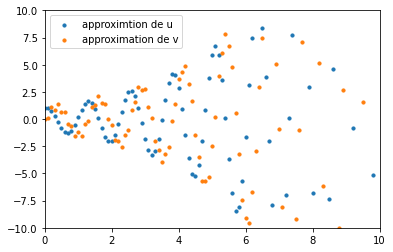

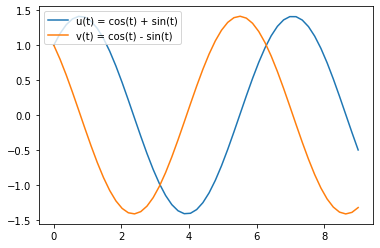

In [15]:
u0 = 1
v0 = 0

du = -v
dv = u
use_trapezoidal = False

res = solver_octave(u0, v0, du, dv, use_trapezoidal)

time = []
coords_u = []
coords_v = []

for i in range(0, len(res[0])):
    time.append(res[0][i][0])
    coords_u.append(res[0][i][1])
    coords_v.append(res[1][i][1])

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(time, coords_u, s=10, label='approximtion de u')
ax1.scatter(time, coords_v, s=10, label='approximation de v')
plt.xlim([0, 10])
plt.ylim([-10, 10])
plt.legend(loc='upper left');
plt.show()

graph = plt.subplot()
x = np.linspace(0, 9)
y = np.cos(x) + np.sin(x)
z = np.cos(x) - np.sin(x)
graph.plot(x, y, label ='u(t) = cos(t) + sin(t)')
graph.plot(x, z, label ='v(t) = cos(t) - sin(t)')
plt.legend(loc='upper left')  
plt.show()